# Data Project

> **Note:** 
> 1. This is a starting point for how to structure your data project 
> 1. The `dataproject.py` file includes functions which can be in this notebook

Import and set magics:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

## Question 1

We load and download the data using pandas and StatistikBankens API.

In [9]:
#Data work
#Importing data and saving as a dataframe
url = "https://api.statbank.dk/v1/data/PRIS113/CSV?TYPE=INDEKS&Tid=*"
data = pd.read_csv(url, sep=';')

#Converting commas to dots
data['INDHOLD'] = data['INDHOLD'].str.replace(',', '.')
data['INDHOLD'] = pd.to_numeric(data['INDHOLD'])
#Converting date strings to datetime
data['TID'] = pd.to_datetime(data['TID'], format='%YM%m')

#1.1 (1.)
#Finding the value of 2020M01
base_value = data.loc[data['TID'] == '2020-01-01', 'INDHOLD'].values[0]
print(base_value)

#Creating a new column with index 2020M01=100
data['INDEKS_2020'] = data['INDHOLD'] / base_value *100
print(data.head())
#Check
print(data[data['INDEKS_2020'] == 100])






103.0
                  TYPE        TID  INDHOLD  INDEKS_2020
0  Forbrugerprisindeks 1980-01-01     33.0    32.038835
1  Forbrugerprisindeks 1980-02-01     33.3    32.330097
2  Forbrugerprisindeks 1980-03-01     33.8    32.815534
3  Forbrugerprisindeks 1980-04-01     34.0    33.009709
4  Forbrugerprisindeks 1980-05-01     34.5    33.495146
                    TYPE        TID  INDHOLD  INDEKS_2020
480  Forbrugerprisindeks 2020-01-01    103.0        100.0


## Question 2

We process the data by ...

KeyError: 'log_GDP'

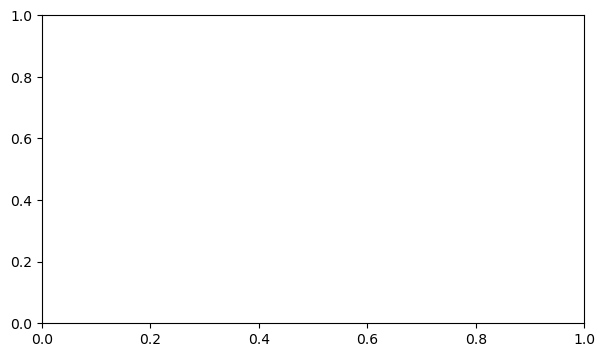

In [10]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.plot(data['log_GDP'],label='log(GDP)')

ax.set_title('Log GDP over time')
ax.set_xlabel('Year')
ax.set_ylabel('Log GDP')

ax.legend(); 

We find that that ...